<a href="https://colab.research.google.com/github/wahyuazizi/Predictive_Analysis_ML_Dicoding/blob/main/Predicitve_Analysis_Vehicle_Emissions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

brsahan_vehicle_co2_emissions_dataset_path = kagglehub.dataset_download('brsahan/vehicle-co2-emissions-dataset')
jeleeladekunlefijabi_ship_fuel_consumption_and_co2_emissions_analysis_path = kagglehub.dataset_download('jeleeladekunlefijabi/ship-fuel-consumption-and-co2-emissions-analysis')
wahyuazizi_kagglesjson_path = kagglehub.dataset_download('wahyuazizi/kagglesjson')

print('Data source import complete.')


In [ ]:
!pip install --upgrade seaborn pandas

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
import kagglehub
import os

# Data Understanding

## Data Loading

In [ ]:
# Download
path = kagglehub.dataset_download("brsahan/vehicle-co2-emissions-dataset")

print("path dataset: ", path)

path dataset:  /kaggle/input/vehicle-co2-emissions-dataset


In [ ]:
# Cek list file dalam path
files = os.listdir(path)
print("daftar file dalam path:")
for file in files:
    print(file)

daftar file dalam path:
co2.csv


In [ ]:
# Load dataset
df = pd.read_csv(f"{path}/{file}", low_memory=False)
print(df.shape)

pd.set_option('display.max_columns', None)
df.head()

(7385, 12)


,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


Dari hasil diatas diperoleh:
* total record sebanyak
* terdapat

## Exploratory Data Analysis

### EDA - Deskripsi Variabel

| Nama Kolom                          | Deskripsi                                                                 |
|-------------------------------------|---------------------------------------------------------------------------|
| Make                                | Merek atau produsen kendaraan (contoh: Toyota, Ford, BMW).               |
| Model                               | Model spesifik kendaraan.                                                |
| Vehicle Class                       | Klasifikasi kendaraan berdasarkan ukuran dan penggunaan (contoh: SUV, Sedan). |
| Engine Size(L)                      | Volume kapasitas mesin dalam liter.                                      |
| Cylinders                           | Jumlah silinder pada mesin kendaraan.                                    |
| Transmission                        | Jenis transmisi kendaraan (contoh: Otomatis, Manual).                    |
| Fuel Type                           | Jenis bahan bakar yang digunakan oleh kendaraan.                         |
| Fuel Consumption City (L/100 km)    | Konsumsi bahan bakar di area perkotaan dalam liter per 100 kilometer.    |
| Fuel Consumption Hwy (L/100 km)     | Konsumsi bahan bakar di jalan raya dalam liter per 100 kilometer.        |
| Fuel Consumption Comb (L/100 km)    | Konsumsi bahan bakar gabungan (rata-rata kota dan jalan raya) dalam liter per 100 kilometer. |
| Fuel Consumption Comb (mpg)         | Konsumsi bahan bakar gabungan dalam mil per galon (mpg).                 |
| CO2 Emissions(g/km)                 | Emisi karbon dioksida per kilometer (target prediksi).                   |

### Penjelasan Fuel Type:
- **X**: Bensin biasa (regular gasoline)  
- **Z**: Bensin premium (premium gasoline)  
- **D**: Diesel  
- **E**: E85 (campuran bensin dan etanol)  
- **B**: Listrik (electricity)  
- **N**: Gas alam (natural gas)  


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

### EDA - Cleaning Data

#### Menangani Missing Value

In [ ]:
print("Daftar Missing Value:\n", df.isnull().sum())

Daftar Missing Value:
 Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64


#### Menangani Outliers

In [ ]:
df.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


In [ ]:
numerical_features = df.select_dtypes(include=np.number).columns

n_cols = 2
n_rows = (len(numerical_features) + n_cols -1) // n_cols

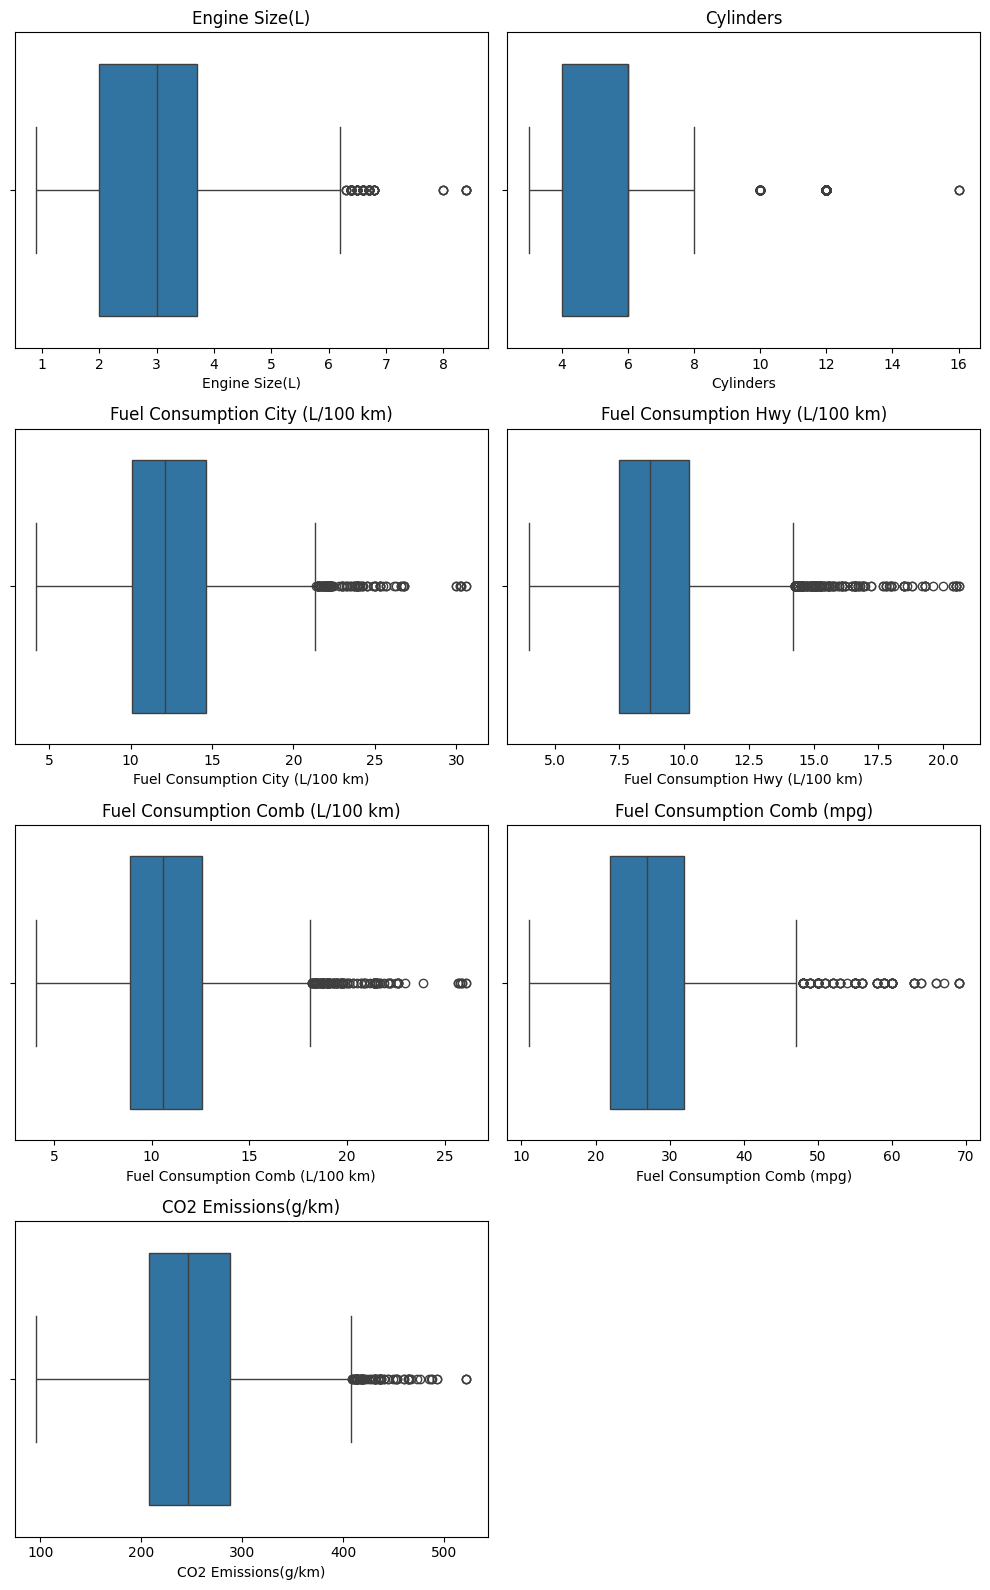

In [ ]:
# setup figure dengan subplot
fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 4 * n_rows))

axes = axes.flatten()
for i in range(len(numerical_features)):
    sns.boxplot(ax=axes[i], x=df[numerical_features[i]])
    axes[i].set_title(numerical_features[i])

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [ ]:
numerical_features = df.select_dtypes(include=['number'])

Q1 = numerical_features.quantile(0.25)
Q3 = numerical_features.quantile(0.75)
IQR = Q3 - Q1

# Menyaring outlier berdasarkan IQR
df = df[~((numerical_features < (Q1 - 1.5 * IQR)) | (numerical_features > (Q3 + 1.5 * IQR))).any(axis=1)]


In [ ]:
df.shape

(6826, 12)

### EDA - Univariate Analysis

#### Categorical Features

In [ ]:
categorical_features = df.select_dtypes(include=['object'])
categorical_features = categorical_features.drop(columns=['Model'])

In [ ]:
import matplotlib.pyplot as plt

def plot_feature_distribution(features, ax):
    # Calculate value counts and percentages
    count = df[features].value_counts()
    percent = 100 * df[features].value_counts(normalize=True)
    df_summary = pd.DataFrame({'jumlah sampel': count, 'persentase': percent.round(1)})

    # Plot the bar chart on the provided axis (ax)
    count.plot(kind='bar', ax=ax, title=f"Distribusi untuk {features}")
    ax.set_xticklabels(count.index, rotation=45, ha='right')
    ax.set_ylabel("Jumlah Sampel")
    ax.set_xlabel(features)

    # Annotate the bars with percentage values
    for p in ax.patches:
        height = p.get_height()
        x = p.get_x() + p.get_width() / 2  # Get x-coordinate for the label

        # Find the corresponding percentage for each category
        category_index = count.index.get_loc(count.index[int(x)])  # Match the index of the category
        percentage = percent.iloc[category_index]  # Get the percentage for this category

        # Add the percentage value as text on top of each bar
        ax.text(x, height + 1, f'{percentage:.1f}%', ha='center', fontsize=10)


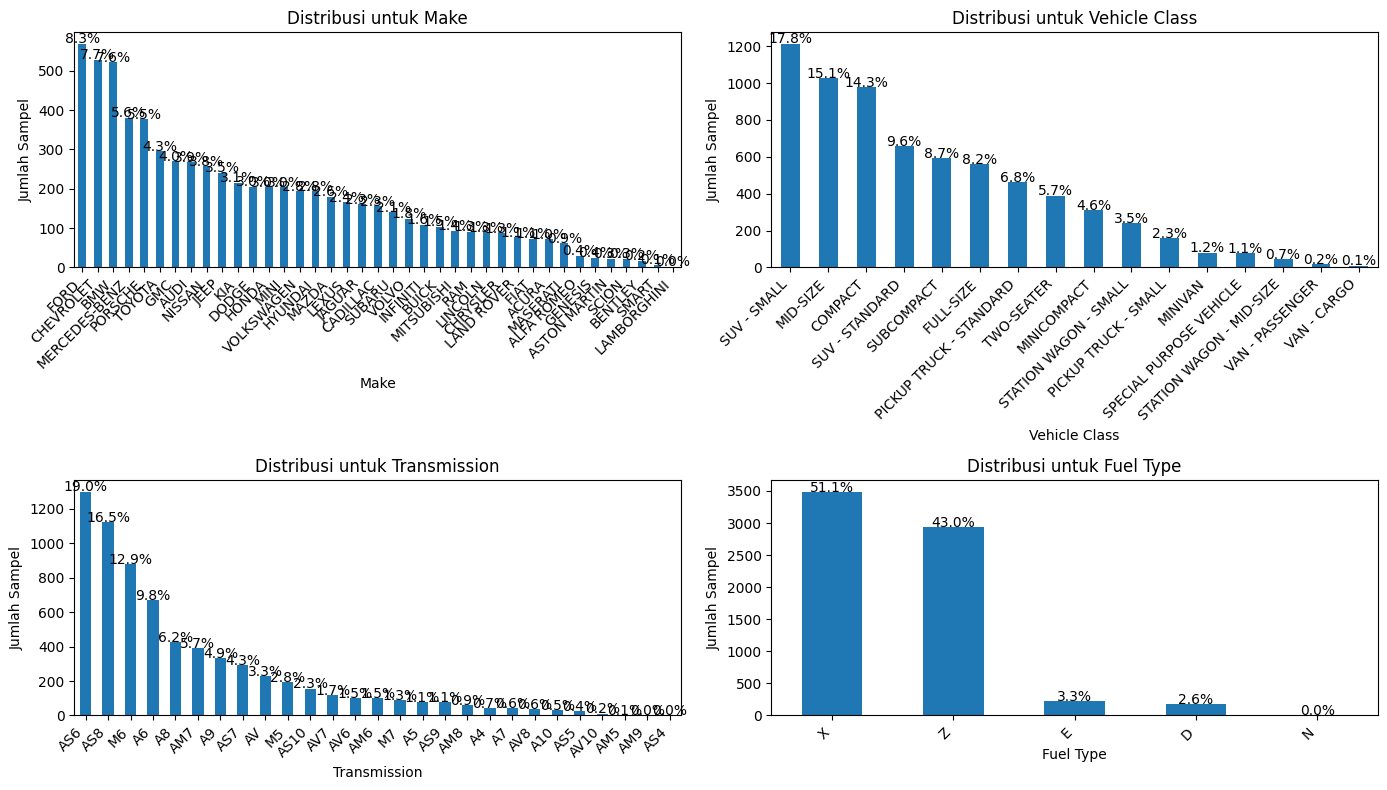

In [ ]:
# Create a new figure with multiple subplots
n_cols = 2  # Tentukan jumlah kolom
n_rows = (len(categorical_features.columns) + n_cols - 1) // n_cols  # Menentukan jumlah baris secara otomatis
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 4 * n_rows))  # Sesuaikan ukuran figure

# Flatten axes array untuk mempermudah indexing
axes = axes.flatten()

# Loop melalui fitur kategorikal dan plot
for i, feature in enumerate(categorical_features.columns):
    plot_feature_distribution(feature, axes[i])

# Menghapus subplot yang tidak terpakai jika ada
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()  # Sesuaikan tata letak agar lebih rapat
plt.show()


#### Numerical Features

<function matplotlib.pyplot.show(close=None, block=None)>

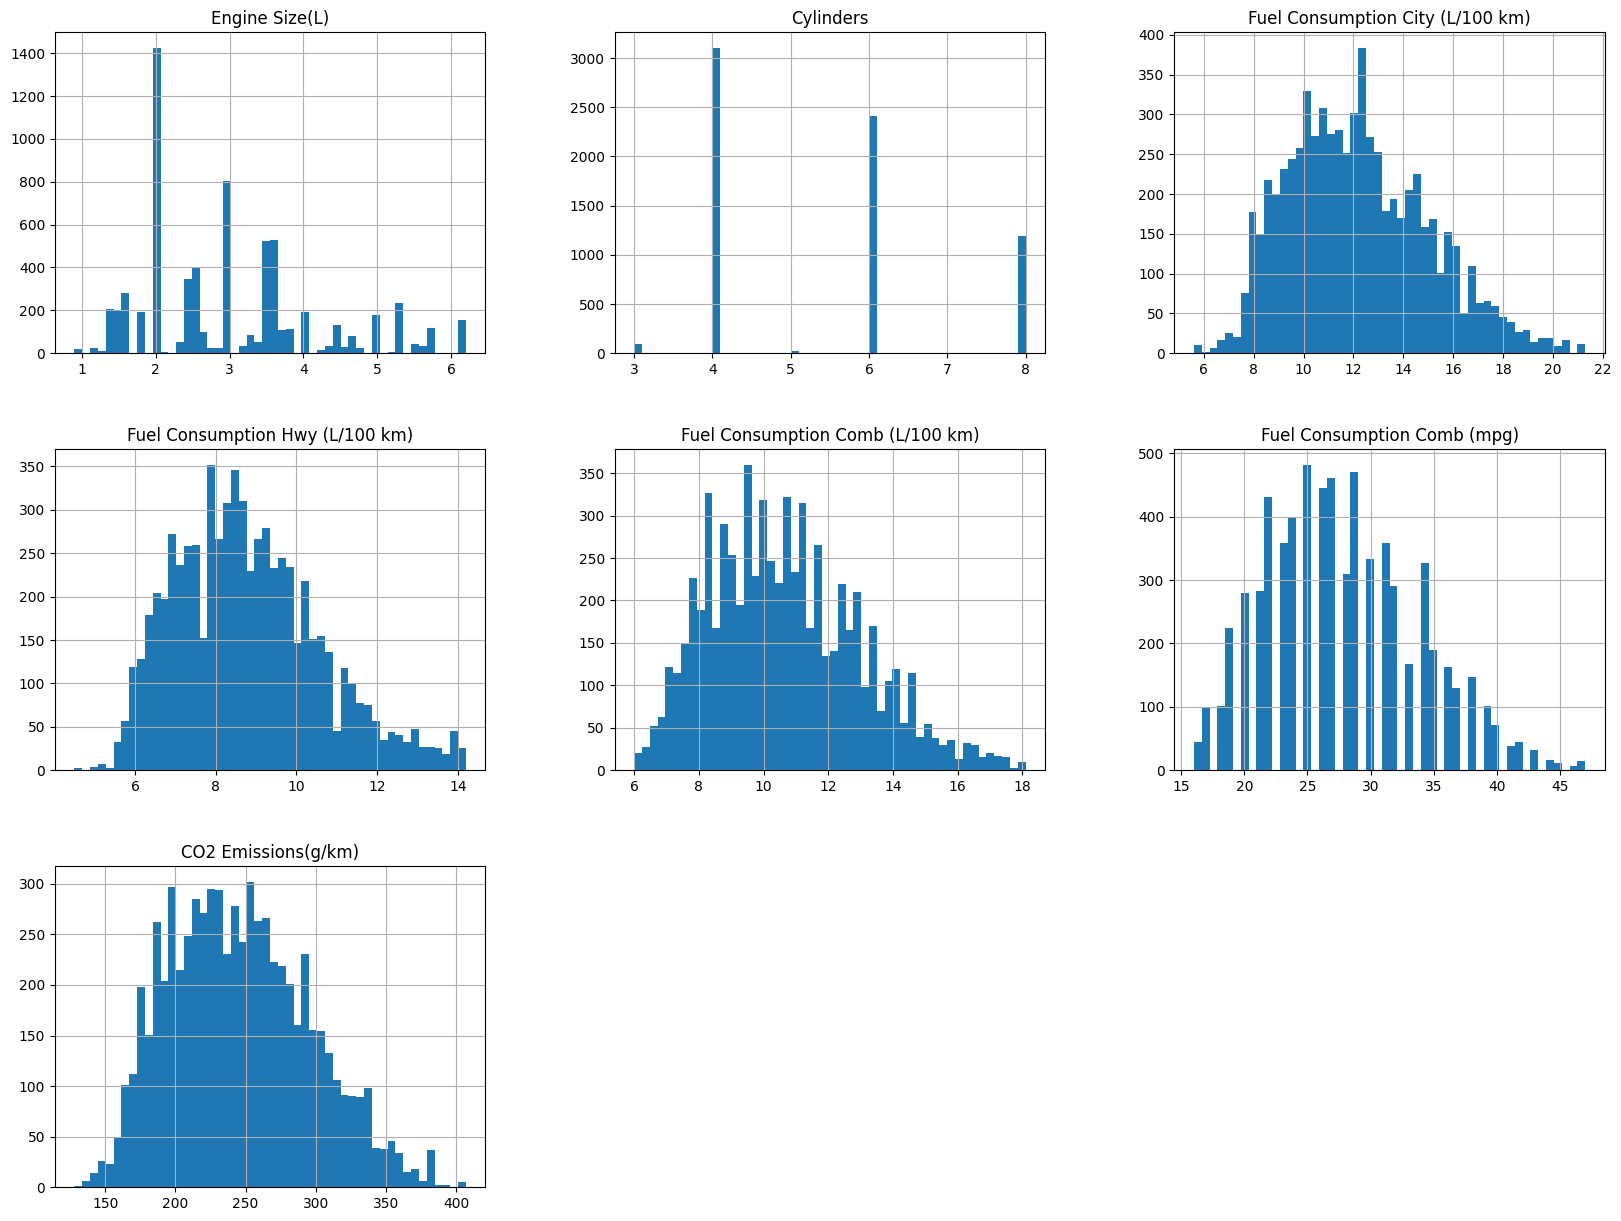

In [ ]:
df.hist(bins=50, figsize=(20,15))
plt.show

### EDA - Multivariate Analysis

#### Categorical Features

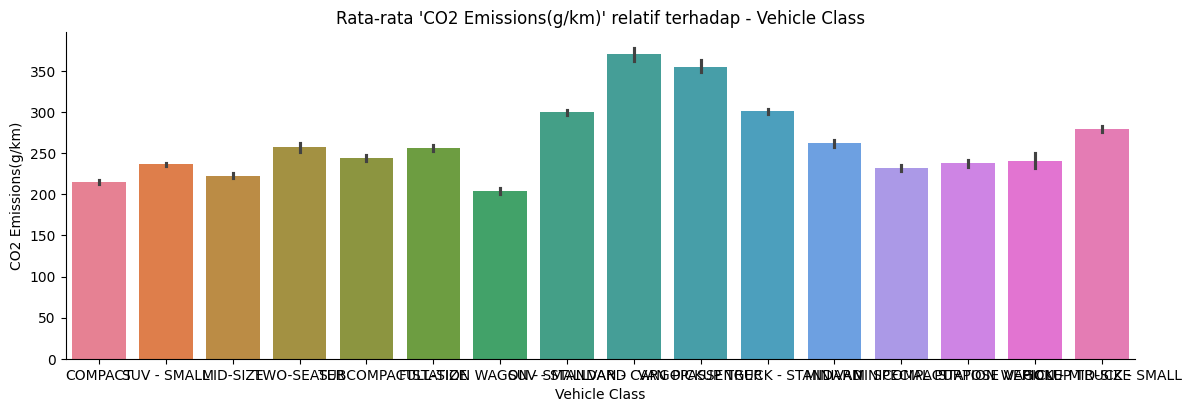

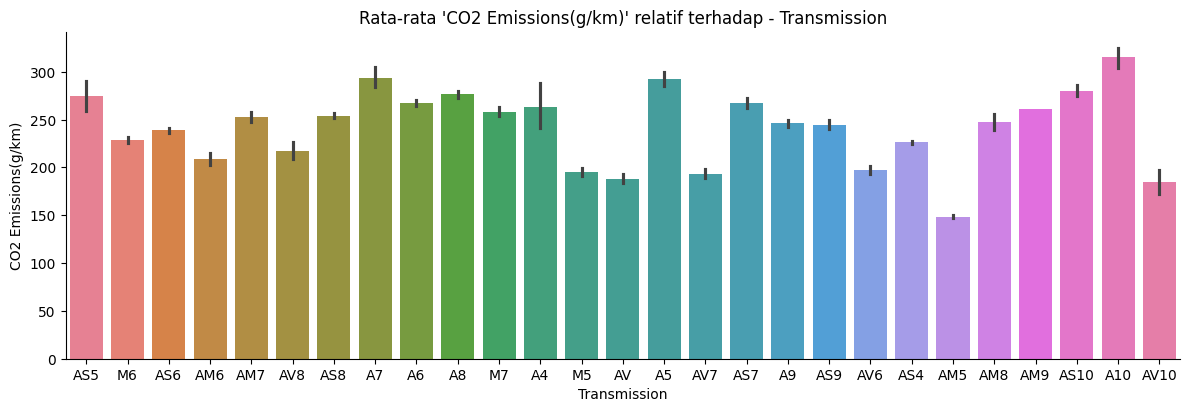

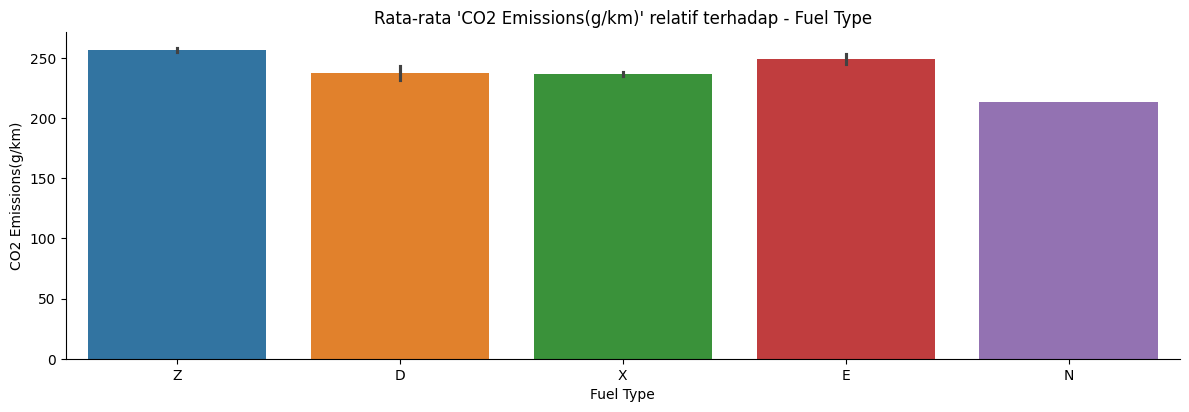

In [ ]:
y = ['CO2 Emissions(g/km)']
x = ['Vehicle Class', 'Transmission', 'Fuel Type']
for f in (y):
    for col in x:
        sns.catplot(data=df, x=col, y=f, kind='bar', dodge=False, height = 4, aspect = 3, hue=col)
        plt.title(f"Rata-rata '{f}' relatif terhadap - {col}")

#### Numerical Features

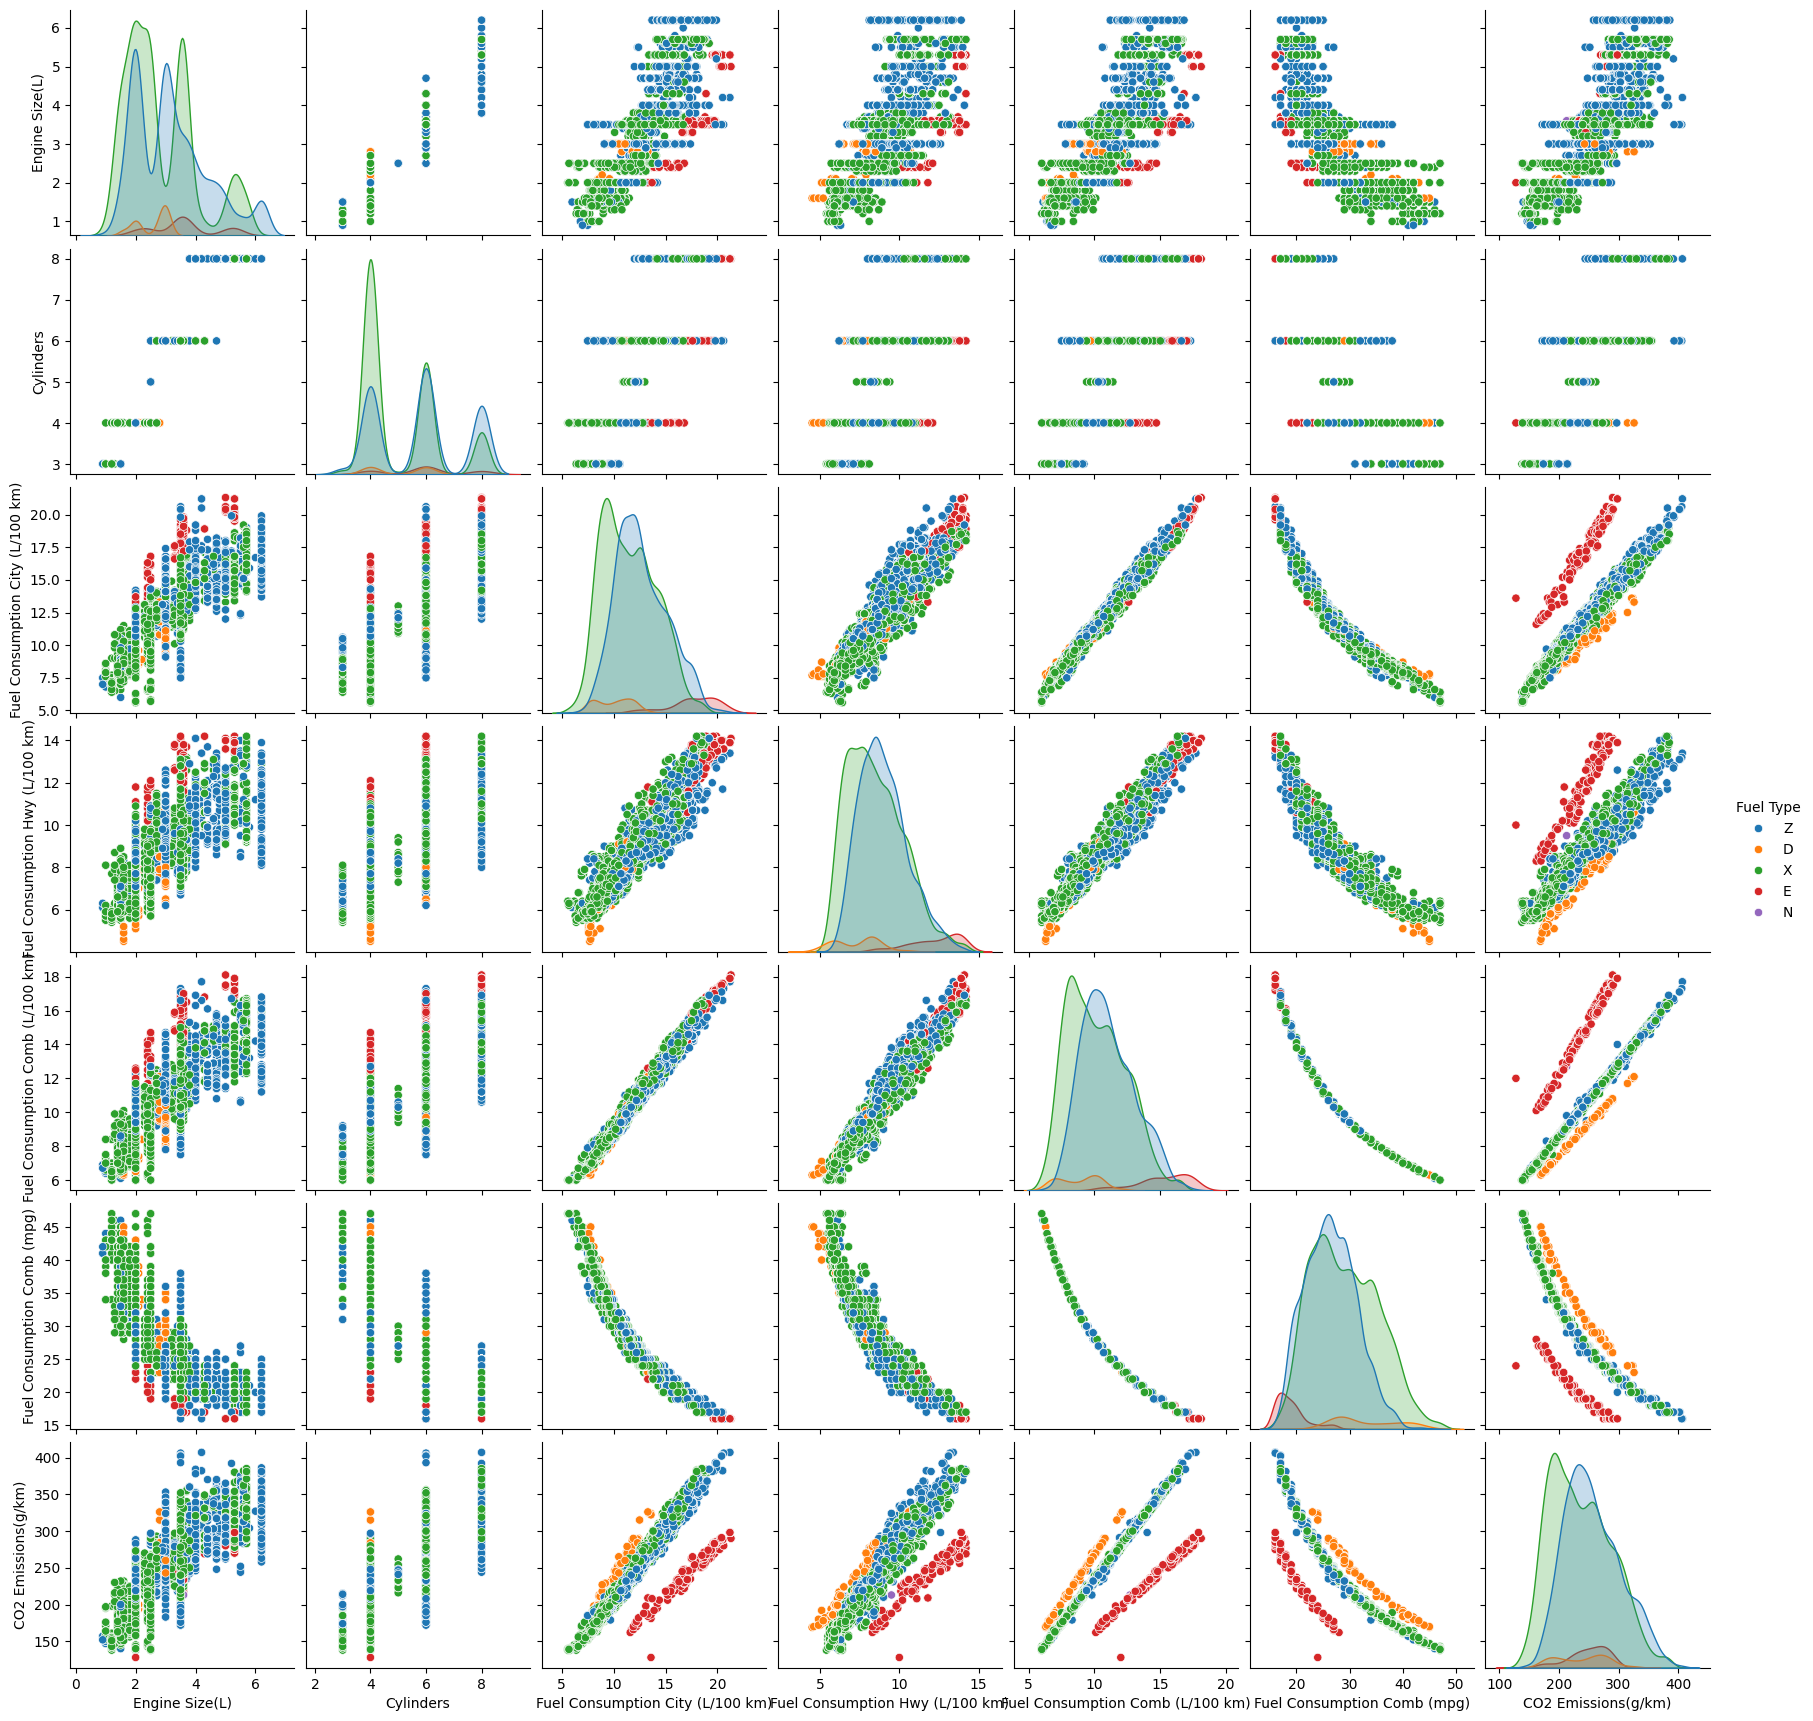

In [ ]:
sns.pairplot(df, diag_kind='kde', hue="Fuel Type")

In [ ]:
# Memeriksa apakah ada nilai NaN di kolom numerik
nan_values = numeric_df.isna().sum()

print(nan_values)


Engine Size(L)                      0
Cylinders                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64
